# Part2
* Ruben Nhez
* Student Number: 33704576
* I worked and submitted alone


# Introduction:
For this coursework I choose 3 algorithms and they were K- Nearest Neighbour, Random Forest and XGBoost
* This task is based on a real credit risk data, and is to predict a response variable Y which represents a credit card default payment (Yes = 1, No = 0), using the 23 input variables as follows:

# Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
import pandas as pd
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#Sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

## Load the data frame

In [2]:
train = pd.read_csv('creditdefault_train.csv')
test = pd.read_csv ('creditdefault_test.csv')

# Looking at the data

In [3]:
train

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,100000,1,1,2,38,0,-1,-1,0,...,102996,70626,69473,55004,2000,111784,4000,3000,2000,2000
14996,0,220000,1,3,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
14997,0,150000,1,3,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
14998,1,30000,1,2,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [4]:
test

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,0,140000,2,3,1,28,0,0,2,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
3,0,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
4,0,200000,2,3,2,34,0,0,2,0,...,5535,2513,1828,3731,2306,12,50,300,3738,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,150000,1,1,2,35,-1,-1,-1,-1,...,-3,780,0,0,9054,0,783,0,0,0
14996,0,140000,1,2,1,41,0,0,0,0,...,139110,138262,49675,46121,6000,7000,4228,1505,2000,2000
14997,0,10000,1,3,1,43,0,0,0,-2,...,0,0,0,0,2000,0,0,0,0,0
14998,1,80000,1,2,2,34,2,2,2,2,...,79384,77519,82607,81158,7000,3500,0,7000,0,4000


In [5]:
train.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770


In [6]:
test.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,0,140000,2,3,1,28,0,0,2,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
3,0,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
4,0,200000,2,3,2,34,0,0,2,0,...,5535,2513,1828,3731,2306,12,50,300,3738,66


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       15000 non-null  int64
 1   X1      15000 non-null  int64
 2   X2      15000 non-null  int64
 3   X3      15000 non-null  int64
 4   X4      15000 non-null  int64
 5   X5      15000 non-null  int64
 6   X6      15000 non-null  int64
 7   X7      15000 non-null  int64
 8   X8      15000 non-null  int64
 9   X9      15000 non-null  int64
 10  X10     15000 non-null  int64
 11  X11     15000 non-null  int64
 12  X12     15000 non-null  int64
 13  X13     15000 non-null  int64
 14  X14     15000 non-null  int64
 15  X15     15000 non-null  int64
 16  X16     15000 non-null  int64
 17  X17     15000 non-null  int64
 18  X18     15000 non-null  int64
 19  X19     15000 non-null  int64
 20  X20     15000 non-null  int64
 21  X21     15000 non-null  int64
 22  X22     15000 non-null  int64
 23  X23     150

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       15000 non-null  int64
 1   X1      15000 non-null  int64
 2   X2      15000 non-null  int64
 3   X3      15000 non-null  int64
 4   X4      15000 non-null  int64
 5   X5      15000 non-null  int64
 6   X6      15000 non-null  int64
 7   X7      15000 non-null  int64
 8   X8      15000 non-null  int64
 9   X9      15000 non-null  int64
 10  X10     15000 non-null  int64
 11  X11     15000 non-null  int64
 12  X12     15000 non-null  int64
 13  X13     15000 non-null  int64
 14  X14     15000 non-null  int64
 15  X15     15000 non-null  int64
 16  X16     15000 non-null  int64
 17  X17     15000 non-null  int64
 18  X18     15000 non-null  int64
 19  X19     15000 non-null  int64
 20  X20     15000 non-null  int64
 21  X21     15000 non-null  int64
 22  X22     15000 non-null  int64
 23  X23     150

In [9]:
train.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.221200,167450.245333,1.604867,1.850000,1.556200,35.367933,-0.020467,-0.130933,-0.163000,-0.214467,...,47117.562067,43077.445667,40272.922667,38708.685867,5615.960000,5.822059e+03,4942.959000,4997.328867,4798.478400,5226.421267
std,0.415069,130109.925023,0.488896,0.786686,0.522743,9.154118,1.125048,1.198451,1.202606,1.180578,...,69182.434940,64016.907786,60503.339354,59212.425410,15551.708028,2.155675e+04,13629.034736,16499.349511,15463.948485,18099.851948
min,0.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-34041.000000,-170000.000000,-46627.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2733.500000,2392.750000,1800.000000,1200.000000,1000.000000,8.330000e+02,390.000000,290.000000,204.000000,80.000000
50%,0.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,20165.000000,19090.500000,18178.000000,17177.000000,2113.000000,2.014000e+03,1809.000000,1500.000000,1500.000000,1500.000000
75%,0.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,60263.250000,54599.500000,50134.750000,49122.750000,5023.250000,5.000000e+03,4571.500000,4048.500000,4019.500000,4000.000000
max,1.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,...,855086.000000,706864.000000,587067.000000,568638.000000,493358.000000,1.227082e+06,380478.000000,528897.000000,426529.000000,528666.000000


In [10]:
test.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.221200,167518.40000,1.602600,1.856267,1.547533,35.603067,-0.012933,-0.136600,-0.169400,-0.226867,...,4.690875e+04,43448.452267,40349.879267,39034.834933,5711.201000,6.020268e+03,5508.404000,4654.824867,4800.296867,5204.583867
std,0.415069,129388.71212,0.489376,0.794008,0.521177,9.280067,1.122579,1.195953,1.191133,1.157593,...,6.951809e+04,64648.862167,61091.551799,59895.370421,17516.924518,2.443534e+04,20835.555914,14784.664100,15090.894847,17449.721214
min,0.000000,10000.00000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-50616.000000,-81334.000000,-150953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50000.00000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.639000e+03,2290.500000,1729.500000,1307.750000,980.750000,8.327500e+02,390.750000,300.000000,286.750000,156.750000
50%,0.000000,140000.00000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.004050e+04,19012.500000,18025.000000,16924.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1519.000000,1500.000000
75%,0.000000,240000.00000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,6.000650e+04,54407.000000,50247.250000,49327.000000,5001.000000,5.000000e+03,4500.000000,4001.500000,4041.250000,4007.000000
max,1.000000,1000000.00000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,417990.000000,527143.000000


## Plotting the graphs of data

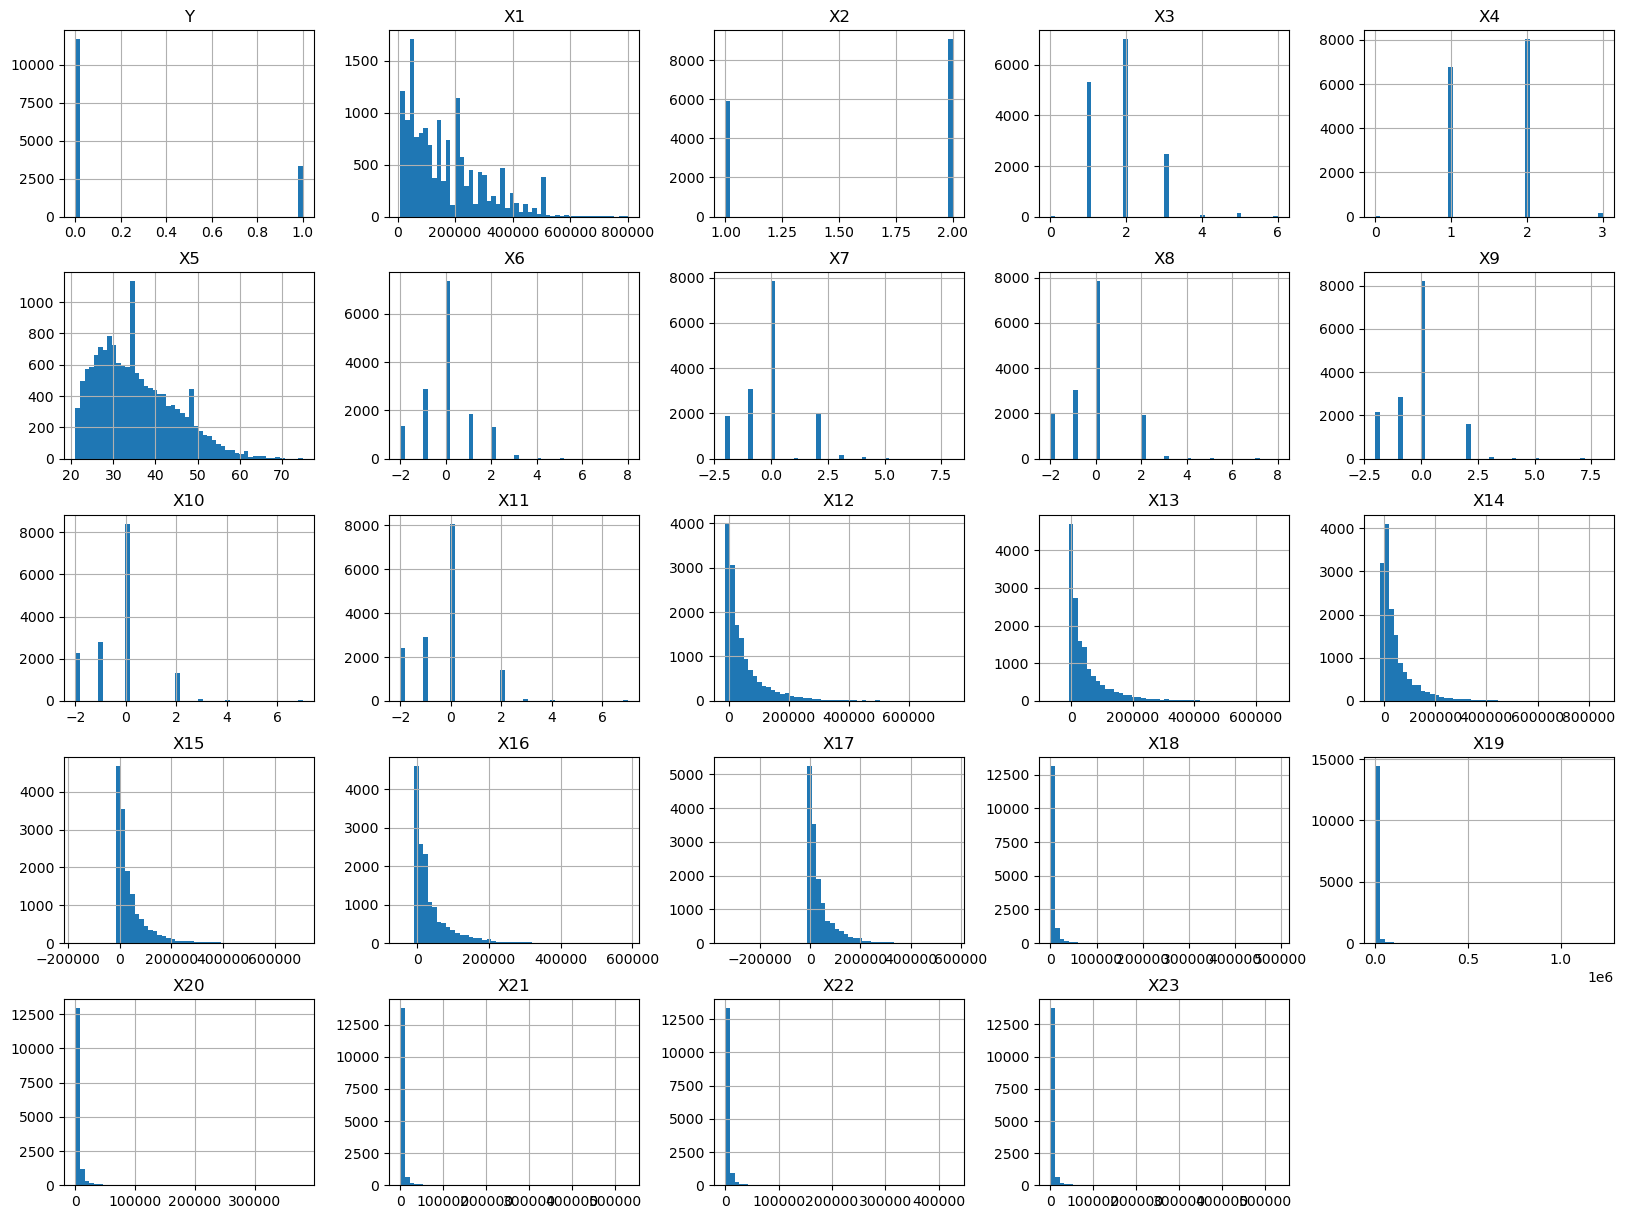

In [11]:
train.hist(bins=50, figsize=(20,15))
plt.show()

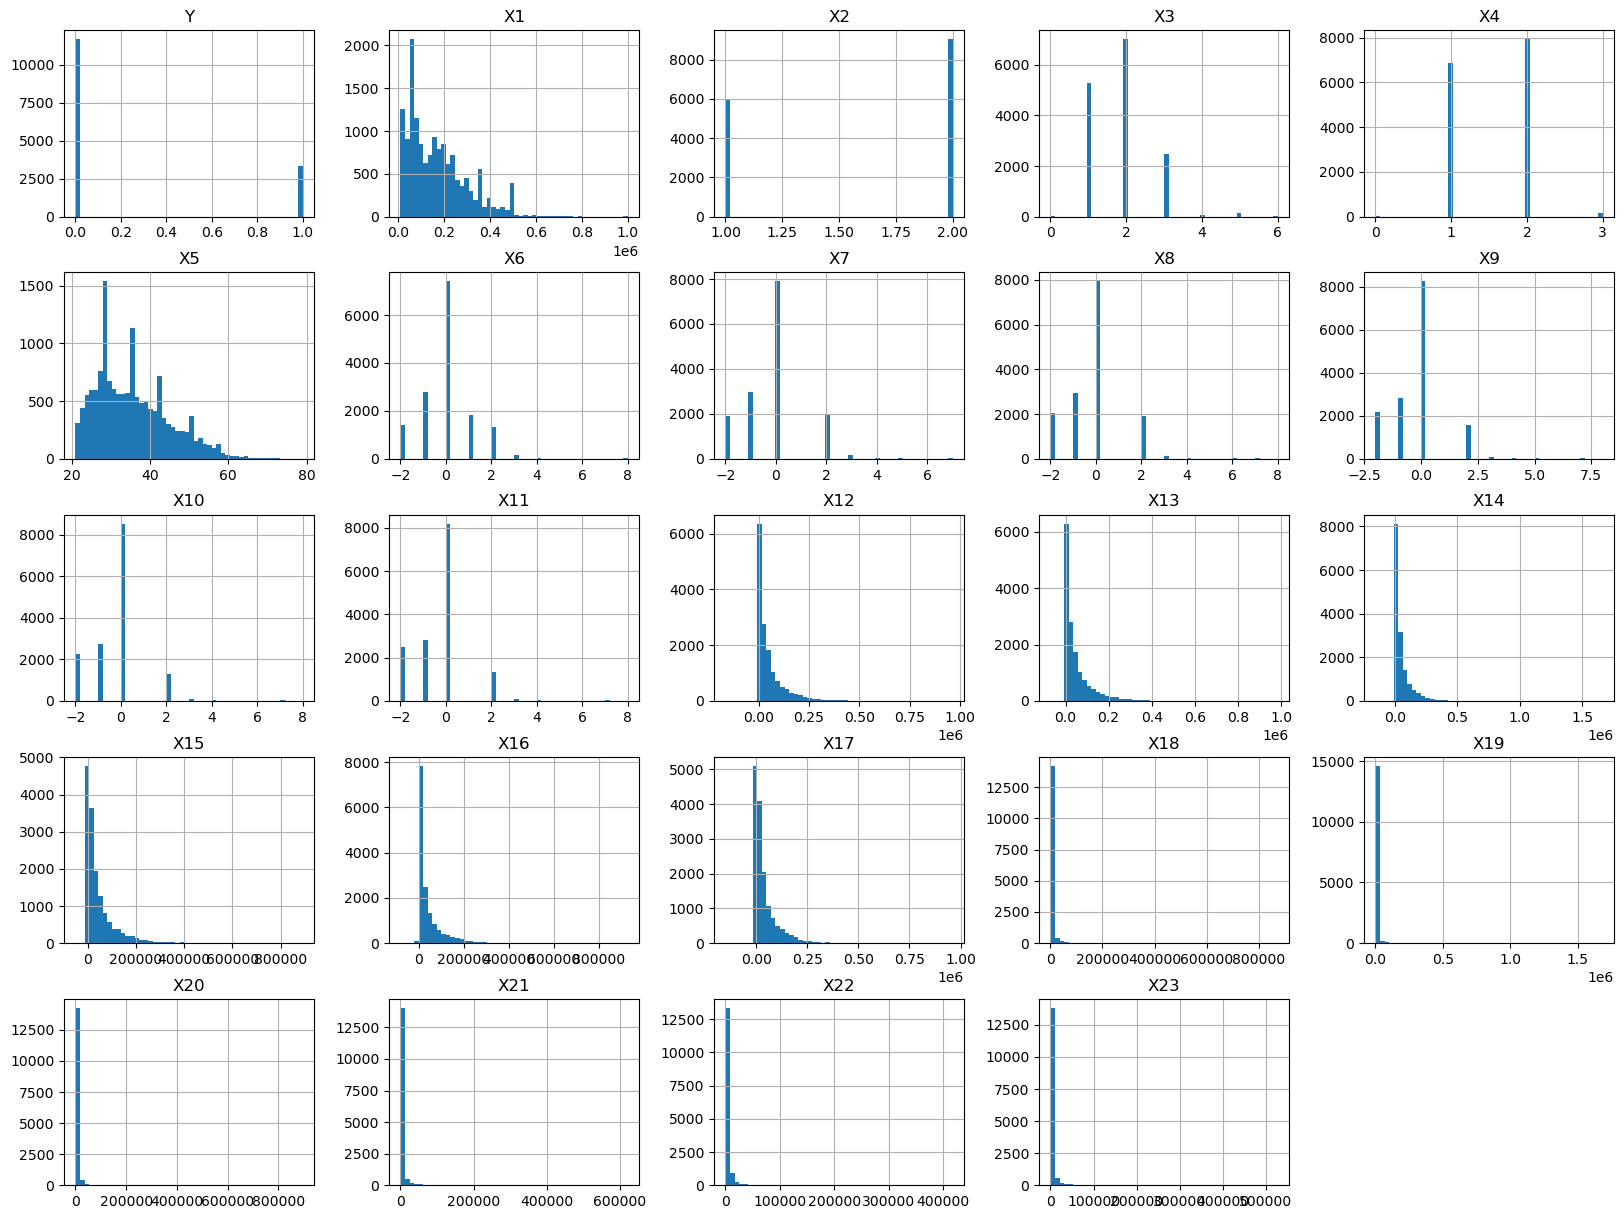

In [12]:
test.hist(bins=50, figsize=(20,15))
plt.show()

### Heatmap and Bar Plot

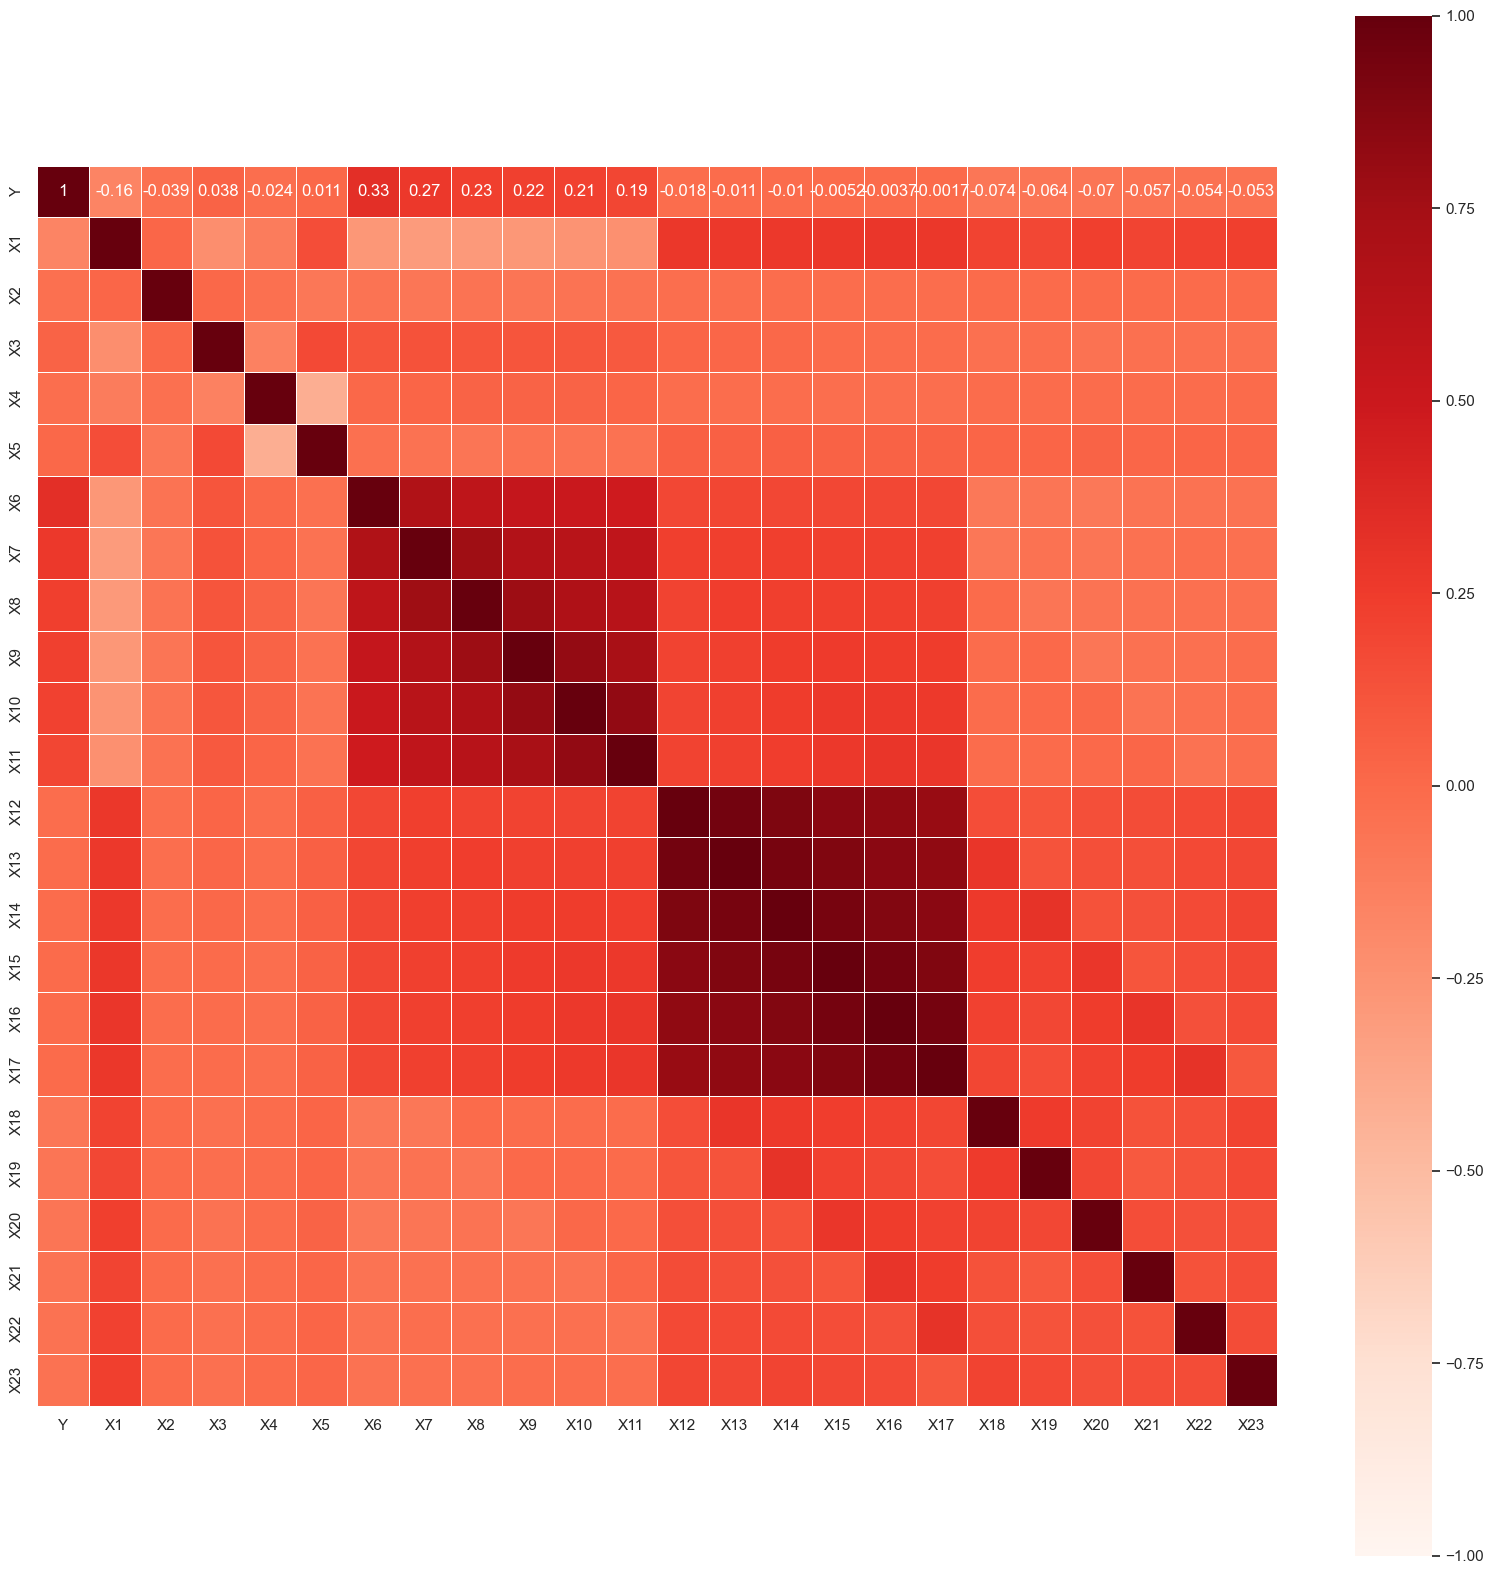

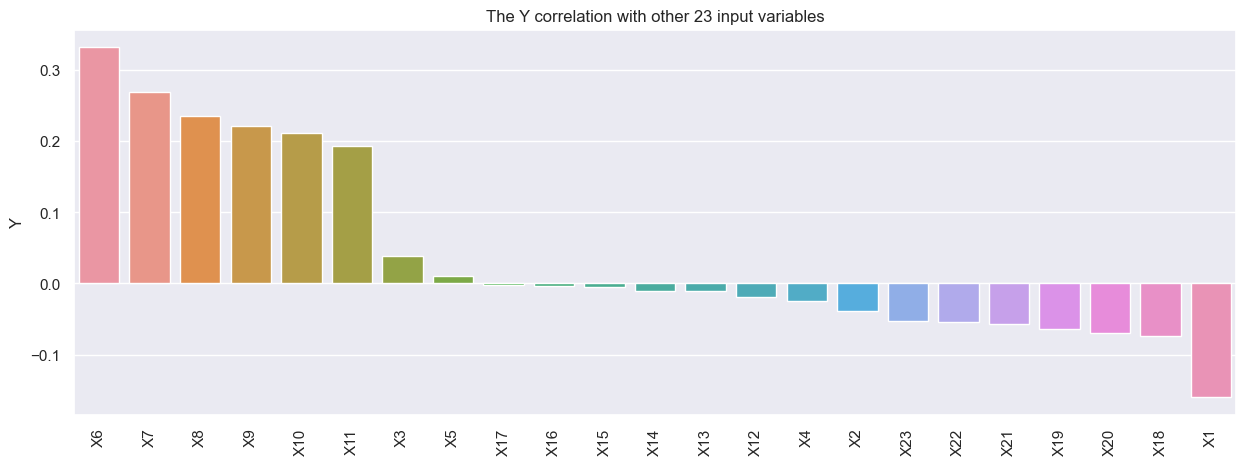

In [13]:
## Showing the relationship between the X values and the specific y value
sns.set(rc={'figure.figsize':(20,20)})
train_correlation = train.corr()
sns.heatmap(train_correlation, annot=True, vmin=-1, vmax=1, center=0, linewidth=.5, cmap='Reds', square= True)

correlation_with_Y = train_correlation.loc['Y']
correlation_with_Y = correlation_with_Y.drop('Y')
correlation_with_Y = correlation_with_Y.sort_values(ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=correlation_with_Y.index, y=correlation_with_Y)
plt.xticks(rotation=90)
plt.title('The Y correlation with other 23 input variables')
plt.show()

# Create Train and Test set

In [14]:
X_train = train.drop('Y', axis=1)
y_train = train['Y']

X_test = test.drop('Y', axis=1)
y_test = test['Y']

# Split the data into training and test sets 70% Training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42, test_size = 0.3)

In [15]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
11797,160000,2,1,1,41,0,0,-1,0,0,...,88072,88783,79684,78656,3360,92532,2859,2638,3000,2584
5899,120000,2,2,1,42,0,0,0,0,0,...,172957,85332,87103,71237,3415,3002,3177,3271,2702,2620
9513,120000,2,1,1,35,0,0,0,0,0,...,15516,17373,17950,18363,2519,3643,2500,1000,689,1000
1572,50000,2,3,1,46,0,0,0,0,-2,...,47991,0,0,0,2000,1018,0,0,0,0
12995,180000,2,1,2,30,-2,-2,-2,-2,-2,...,1352,960,4921,3031,3687,1352,960,4921,3031,2718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,100000,2,2,1,49,-2,-2,-2,-2,-2,...,1261,390,390,390,1261,1261,390,390,390,0
13418,30000,1,2,1,32,0,0,0,2,0,...,29367,28108,26717,11693,3000,5000,0,1003,1000,1000
5390,30000,2,2,2,23,-1,-1,-1,-1,-1,...,1393,1543,1596,2970,1393,1393,1543,1596,2970,0
860,140000,2,2,2,29,-2,-2,-2,-2,-2,...,0,0,0,0,945,0,0,0,0,0


In [16]:
y_train

11797    0
5899     0
9513     0
1572     0
12995    0
        ..
5191     0
13418    0
5390     0
860      0
7270     0
Name: Y, Length: 10500, dtype: int64

In [17]:
X_test

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
11499,230000,2,2,1,46,-1,-1,-1,-1,-1,...,0,632,316,2398,316,0,632,316,2398,1783
6475,50000,2,1,1,34,0,0,0,0,2,...,36372,30305,29742,30556,1971,2000,3342,0,1400,1000
13167,240000,2,2,1,27,0,0,0,0,0,...,139430,142608,145437,148492,5160,5328,5500,5199,5392,5417
862,260000,2,2,1,40,0,0,0,0,0,...,178102,77215,79331,81483,20008,7500,3000,3500,3605,3750
5970,620000,1,1,1,39,0,0,0,0,0,...,90493,90025,88406,89111,5200,5400,3173,3200,3500,3164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4217,300000,2,2,2,36,-1,2,2,-1,-1,...,0,780,70,430,3,0,780,150,710,1000
13886,40000,2,3,1,26,2,2,2,2,2,...,35597,36211,35334,36170,1700,1800,1500,0,1500,1500
10464,30000,1,2,1,33,0,0,0,0,0,...,5540,4605,2880,2516,1102,1128,1000,58,2516,3553
6902,50000,2,2,2,23,0,0,2,2,0,...,12218,13656,15918,10771,3500,2500,1980,3500,1000,0


In [18]:
y_test

11499    1
6475     0
13167    1
862      0
5970     0
        ..
4217     0
13886    1
10464    0
6902     0
4874     0
Name: Y, Length: 4500, dtype: int64

## Scale data

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
X_train_scaled

array([[-0.06247703,  0.80135169, -1.0833225 , ..., -0.14133671,
        -0.11715458, -0.14715705],
       [-0.36951217,  0.80135169,  0.19060361, ..., -0.10494205,
        -0.13598646, -0.14518044],
       [-0.36951217,  0.80135169, -1.0833225 , ..., -0.23551438,
        -0.26319647, -0.23412799],
       ...,
       [-1.06034123,  0.80135169,  0.19060361, ..., -0.20124705,
        -0.11905041, -0.28903388],
       [-0.2159946 ,  0.80135169,  0.19060361, ..., -0.29300991,
        -0.3067373 , -0.28903388],
       [-0.67654731, -1.24789155, -1.0833225 , ...,  0.15821497,
        -0.28209154, -0.24620729]])

In [21]:
X_test_scaled

array([[ 0.49471027,  0.82445815,  0.19085945, ..., -0.31357053,
        -0.15571034, -0.18817749],
       [-0.89324068,  0.82445815, -1.07404117, ..., -0.33583465,
        -0.22413166, -0.23209041],
       [ 0.57181866,  0.82445815,  0.19085945, ...,  0.03046661,
         0.04955361,  0.01562783],
       ...,
       [-1.04745745, -1.21291784,  0.19085945, ..., -0.3317482 ,
        -0.14762044, -0.08891073],
       [-0.89324068,  0.82445815,  0.19085945, ..., -0.0892383 ,
        -0.25155503, -0.28817333],
       [ 0.95736059, -1.21291784,  0.19085945, ..., -0.31286596,
         0.48592803, -0.25732773]])

# Models/Experimentation
This is where I've done all my algorithms, training, data visualisation and talked about the results produced

## K- Nearest Neighbour

In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=15)
scores = cross_val_score(KNN, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.80142857 0.79857143 0.81571429 0.80571429 0.82       0.81714286
 0.80142857 0.80428571 0.80428571 0.80428571 0.80571429 0.81142857
 0.80428571 0.81714286 0.81      ]
mean:  0.808095238095238


In [23]:
# What Parameters can we change
params = KNN.get_params()
print(params)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}


### Train Model with a big number of n_neighbors (100)

In [24]:
KNN.n_neighbors = 100
scores=cross_val_score(KNN, X_train_scaled, y_train, scoring= 'accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.81       0.79       0.80428571 0.80571429 0.80428571 0.81285714
 0.80714286 0.80571429 0.81428571 0.80285714 0.81428571 0.80285714
 0.79857143 0.81428571 0.80285714]
mean:  0.8059999999999999


### Train Model with a Small number of n_neighbors (1)

In [25]:
KNN.n_neighbors = 1
scores=cross_val_score(KNN, X_train_scaled, y_train, scoring= 'accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.72571429 0.73428571 0.74142857 0.72       0.73857143 0.72571429
 0.74142857 0.72714286 0.74428571 0.72714286 0.73571429 0.72571429
 0.72857143 0.71285714 0.73      ]
mean:  0.7305714285714285


### Train Model with auto algorithm

In [26]:
KNN = KNeighborsClassifier(algorithm='auto')
scores=cross_val_score(KNN, X_train_scaled, y_train, scoring= 'accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.78142857 0.78428571 0.81285714 0.79       0.8        0.79857143
 0.79714286 0.77857143 0.79714286 0.78571429 0.78857143 0.79857143
 0.77571429 0.79285714 0.80428571]
mean:  0.7923809523809524


### Train Model with a small Leaf size (10)

In [27]:
KNN = KNeighborsClassifier(n_neighbors=15)
KNN.leaf_size = 10
scores = cross_val_score(KNN, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.80142857 0.79857143 0.81571429 0.80571429 0.82       0.81714286
 0.80142857 0.80428571 0.80428571 0.80428571 0.80571429 0.81142857
 0.80428571 0.81714286 0.81      ]
mean:  0.808095238095238


### Train Model with a large Leaf size (1000)

In [28]:
KNN = KNeighborsClassifier(n_neighbors=15)
KNN.leaf_size = 1000
scores = cross_val_score(KNN, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.80142857 0.79857143 0.81571429 0.80571429 0.82       0.81714286
 0.80142857 0.80428571 0.80428571 0.80428571 0.80571429 0.81142857
 0.80428571 0.81714286 0.81      ]
mean:  0.808095238095238


### Train Model with Weights uniform

In [29]:
KNN = KNeighborsClassifier(weights='uniform')
scores=cross_val_score(KNN, X_train_scaled, y_train, scoring= 'accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.78142857 0.78428571 0.81285714 0.79       0.8        0.79857143
 0.79714286 0.77857143 0.79714286 0.78571429 0.78857143 0.79857143
 0.77571429 0.79285714 0.80428571]
mean:  0.7923809523809524


### Train Model with Metric minkowski

In [30]:
KNN = KNeighborsClassifier(metric='minkowski')
scores=cross_val_score(KNN, X_train_scaled, y_train, scoring= 'accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.78142857 0.78428571 0.81285714 0.79       0.8        0.79857143
 0.79714286 0.77857143 0.79714286 0.78571429 0.78857143 0.79857143
 0.77571429 0.79285714 0.80428571]
mean:  0.7923809523809524


### Grid search - Automate the hyperparameters process

In [74]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

#Specifying hyperparameter using a param_grid
params_grid = [
    {'n_neighbors' : [10, 50, 100, 200, 250,300],
    'leaf_size' : [1, 5, 15, 50, 75, 100],
    'algorithm' : ['auto'],
    'weights' : ['uniform'],
    'metric': ['minkowski']}
]
KNN = KNeighborsClassifier()
grid_search = GridSearchCV(KNN, params_grid, cv=15,
                          scoring='accuracy',
                          return_train_score=True,
                          n_jobs=-1)  # notice n_jobs is number of jobs to run in parallel; when -1, all the processor capacity is used

grid_search.fit(X_train_scaled, y_train)
## Metric scores
y_pred = grid_search.predict(X_test_scaled)
f1 = f1_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

print("F1: ", f1)
print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ",precision)
print()
## Print results from hyperparameters
print('the best parameter values are: ', grid_search.best_params_)
print()
print('the best estimator is: ', grid_search.best_estimator_)
print()
# Display the results for each set of hyperparameters specified
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print("Mean", np.mean(mean_score), params)


F1:  0.3827956989247312
Accuracy:  0.8086666666666666
Recall:  0.267
Precision:  0.6759493670886076

the best parameter values are:  {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 50, 'weights': 'uniform'}

the best estimator is:  KNeighborsClassifier(leaf_size=1, n_neighbors=50)

Mean 0.8058095238095239 {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
Mean 0.8077142857142857 {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 50, 'weights': 'uniform'}
Mean 0.8059999999999999 {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 100, 'weights': 'uniform'}
Mean 0.8047619047619049 {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 200, 'weights': 'uniform'}
Mean 0.8027619047619049 {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 250, 'weights': 'uniform'}
Mean 0.8022857142857143 {'algorithm': 'auto', 'leaf_size

## Plotting the results

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


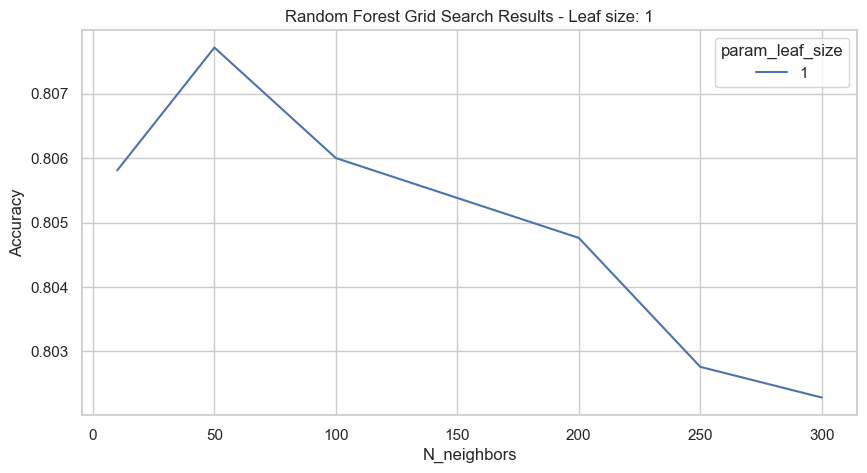

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


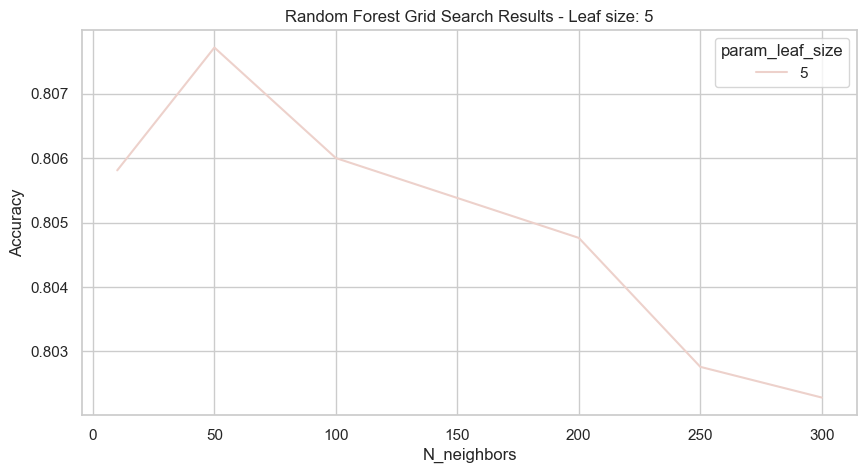

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


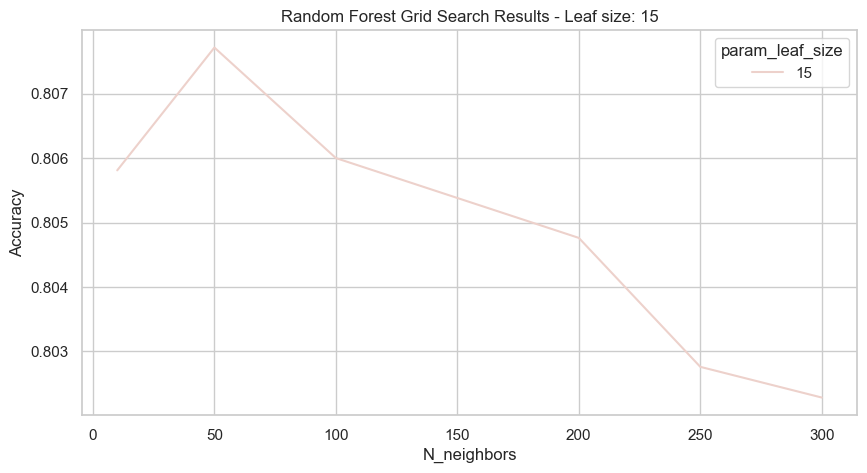

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


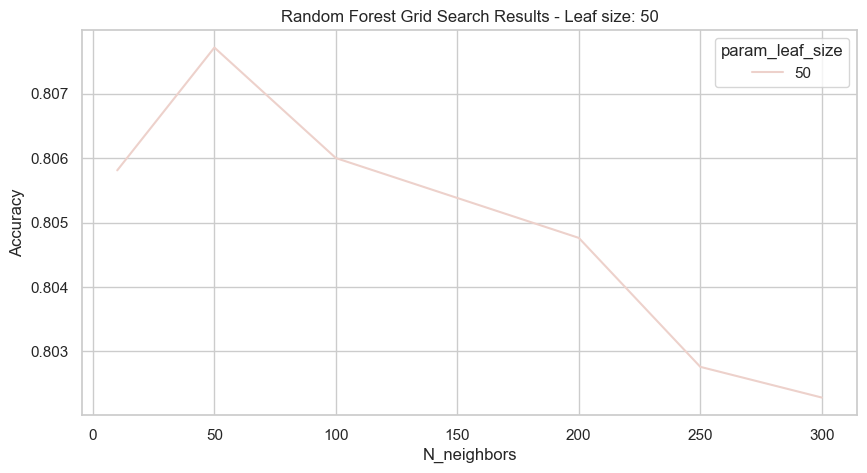

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


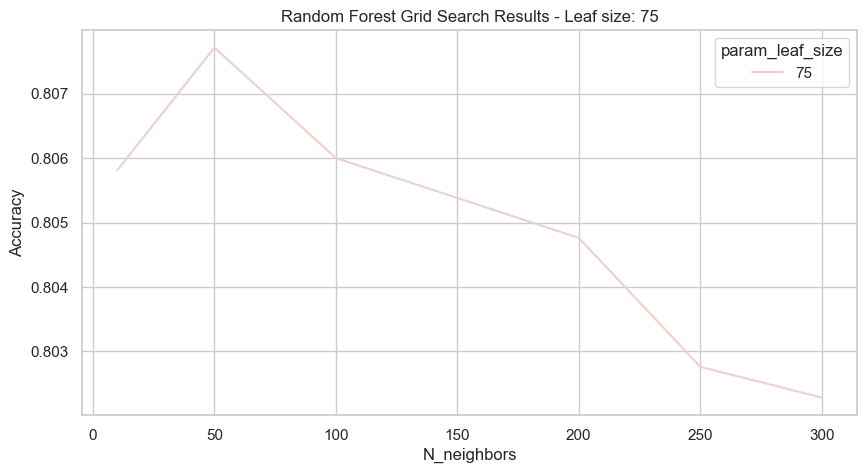

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


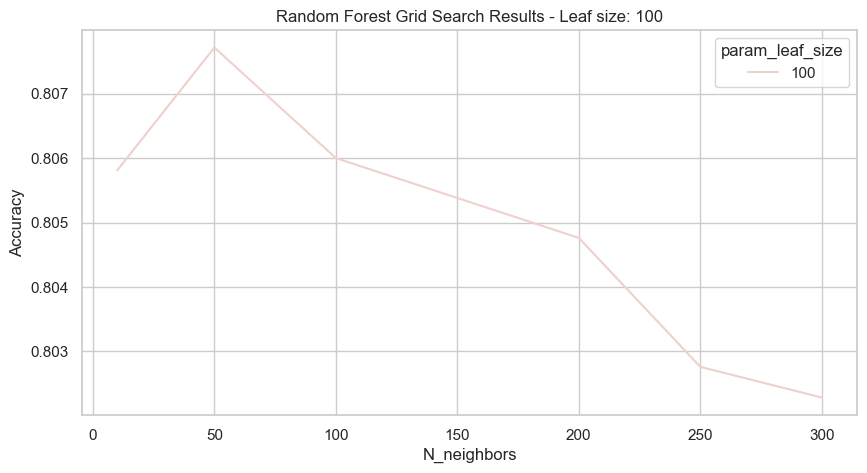

In [75]:
# Convert cv_results dictionary to a DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Set style
sns.set_style("whitegrid")

# Iterate over each value of param_leaf_size
for leaf_size in [1, 5, 15, 50, 75, 100]:
    # Filter cv_results for current leaf_size
    filtered_results = cv_results_df.query(f"param_leaf_size == {leaf_size}")
   
    plt.figure(figsize=(10, 5))
    
    # Plot the data
    sns.lineplot(data=filtered_results, x="param_n_neighbors", y="mean_test_score", hue="param_leaf_size", markers=True)
    
    # Set plot title and labels
    plt.title(f"Random Forest Grid Search Results - Leaf size: {leaf_size}")
    plt.xlabel("N_neighbors")
    plt.ylabel("Accuracy")
    
    # Show the plot
    plt.show()




## Results:

Training with n_neighbors(1,100), algorithmn (Auto), leaft size (10,1000), weights (uniform), metric (minkowski) by themselves:

- 1 n_neighbors = mean:  0.7305714285714285 , 100 n_neighbors = mean:  0.8059999999999999
- 10 leaf size = mean:  0.808095238095238 , 1000 leaf size = mean:  0.808095238095238
- auto algorithm = mean:  0.7923809523809524
- uniform weights = mean:  0.7923809523809524
- minkowski metric = mean:  0.7923809523809524

With these results I can decude that a bigger value of n_neighbors leads to a better mean and when it comes to leaf size 10 leaf size and 1000 gave the same result.

## Grid Search Result:
With the Grid Search my hyperparameters were auto algorithm, leaf size, minkowski metric, n_neighbors and uniform weights and found out that the best parameter values are:  {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 50, 'weights': 'uniform'} with a mean of 0.8077142857142857

## RandomForest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.81       0.80428571 0.82571429 0.82571429 0.83285714 0.82428571
 0.81714286 0.81571429 0.82857143 0.82428571 0.81857143 0.81714286
 0.82857143 0.82285714 0.80428571]
mean:  0.8200000000000001


In [36]:
# See what paramaters we can change
params = rf.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Training model with 10 Max features

In [37]:
rf.max_features = 10
scores = cross_val_score(rf, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.82       0.79571429 0.82571429 0.82285714 0.82857143 0.83428571
 0.80571429 0.80714286 0.83       0.82       0.81428571 0.81142857
 0.82571429 0.82571429 0.80571429]
mean:  0.8181904761904762


### Training model with 100 Max features

In [38]:
rf.max_features = 100
scores = cross_val_score(rf, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.80285714 0.79714286 0.82857143 0.81714286 0.82857143 0.83285714
 0.80142857 0.81428571 0.82428571 0.82285714 0.81714286 0.81285714
 0.81571429 0.83428571 0.80714286]
mean:  0.8171428571428571


### Training model with 20 estimators

In [39]:
rf.n_estimators = 20
scores = cross_val_score(rf, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.80285714 0.79142857 0.81571429 0.82       0.83142857 0.82857143
 0.79285714 0.80142857 0.82428571 0.80857143 0.81428571 0.81
 0.81857143 0.82142857 0.80714286]
mean:  0.8125714285714287


### Training with 300 estimators

In [40]:
rf.n_estimators = 300
scores = cross_val_score(rf, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.81571429 0.8        0.82571429 0.81571429 0.83142857 0.83285714
 0.80285714 0.80714286 0.81857143 0.82       0.81857143 0.81142857
 0.82857143 0.83285714 0.80571429]
mean:  0.817809523809524


### Training with 10 Max leaft nodes

In [41]:
rf.max_leaft_nodes = 10
scores = cross_val_score(rf, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.81142857 0.79714286 0.83285714 0.82428571 0.82857143 0.82714286
 0.80285714 0.80857143 0.82571429 0.82285714 0.81857143 0.81
 0.81857143 0.83285714 0.81285714]
mean:  0.8182857142857144


### Training with 100 Max leaft nodes

In [42]:
rf.max_leaft_nodes = 100
scores = cross_val_score(rf, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.81142857 0.79571429 0.82714286 0.81857143 0.82714286 0.83571429
 0.80142857 0.81714286 0.82428571 0.82285714 0.81285714 0.81571429
 0.82285714 0.82857143 0.80857143]
mean:  0.8179999999999998


### Training with bootstrap

In [43]:
rf.bootstrap = True
scores = cross_val_score(rf, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.80857143 0.79428571 0.83428571 0.82285714 0.82857143 0.83428571
 0.8        0.81428571 0.82714286 0.82       0.81857143 0.81142857
 0.82428571 0.82857143 0.81      ]
mean:  0.8184761904761906


### Grid search - Automate the hyperparameters process

In [77]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


#Specifying hyperparameter using a param_grid
params_grid = [
    {'max_features' : [1, 5, 15, 50, 75, 100],
    'n_estimators' : [10, 50, 100, 200, 250,300 ],
     'bootstrap' : [True],
     'random_state': [42]
}
]
grid_search = GridSearchCV(rf, params_grid, cv=15,
                          scoring='accuracy',
                          return_train_score=True,
                          n_jobs=-1)  # notice n_jobs is number of jobs to run in parallel; when -1, all the processor capacity is used

grid_search.fit(X_train_scaled, y_train)
## Metric scores
y_pred = grid_search.predict(X_test_scaled)
f1 = f1_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

print("F1: ", f1)
print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ",precision)
print()
## Print results from hyperparameters
print('the best parameter values are: ', grid_search.best_params_)
print()
print('the best estimator is: ', grid_search.best_estimator_)
print()
# Display the results for each set of hyperparameters specified
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print("Mean", np.mean(mean_score), params)


F1:  0.4551282051282051
Accuracy:  0.8111111111111111
Recall:  0.355
Precision:  0.6339285714285714

the best parameter values are:  {'bootstrap': True, 'max_features': 15, 'n_estimators': 100, 'random_state': 42}

the best estimator is:  RandomForestClassifier(max_features=15, random_state=42)

Mean 0.8000000000000003 {'bootstrap': True, 'max_features': 1, 'n_estimators': 10, 'random_state': 42}
Mean 0.8092380952380952 {'bootstrap': True, 'max_features': 1, 'n_estimators': 50, 'random_state': 42}
Mean 0.8132380952380953 {'bootstrap': True, 'max_features': 1, 'n_estimators': 100, 'random_state': 42}
Mean 0.8126666666666668 {'bootstrap': True, 'max_features': 1, 'n_estimators': 200, 'random_state': 42}
Mean 0.8127619047619048 {'bootstrap': True, 'max_features': 1, 'n_estimators': 250, 'random_state': 42}
Mean 0.8125714285714288 {'bootstrap': True, 'max_features': 1, 'n_estimators': 300, 'random_state': 42}
Mean 0.8089523809523811 {'bootstrap': True, 'max_features': 5, 'n_estimators': 10

## Plotting the results

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


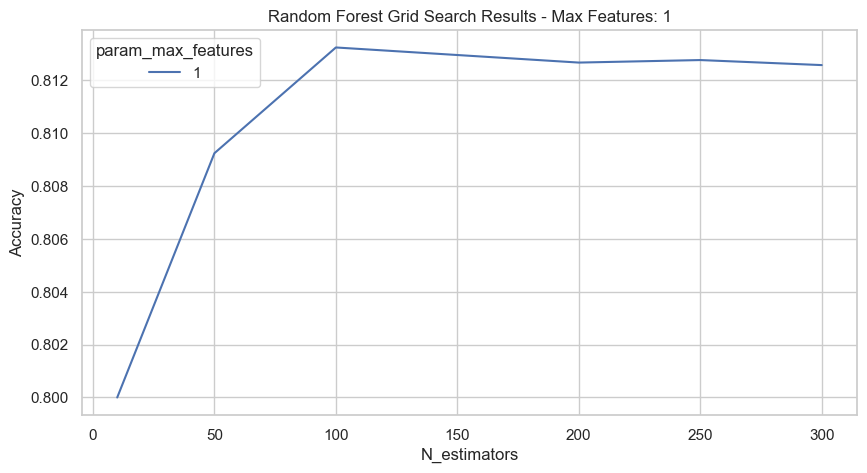

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


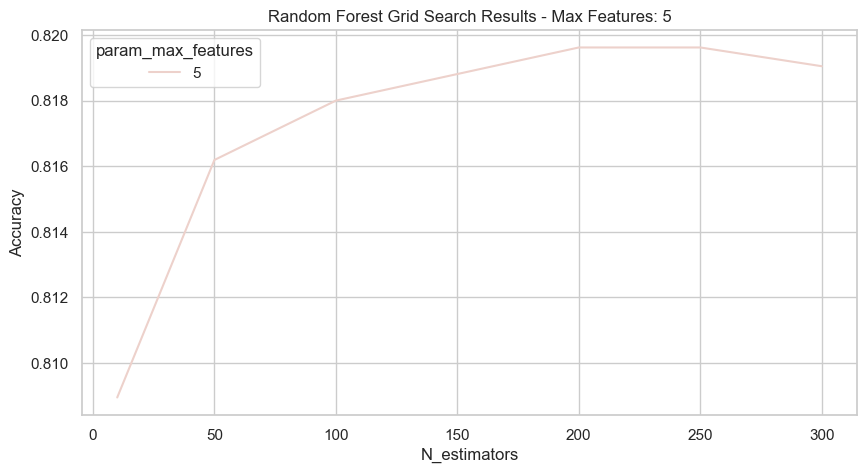

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


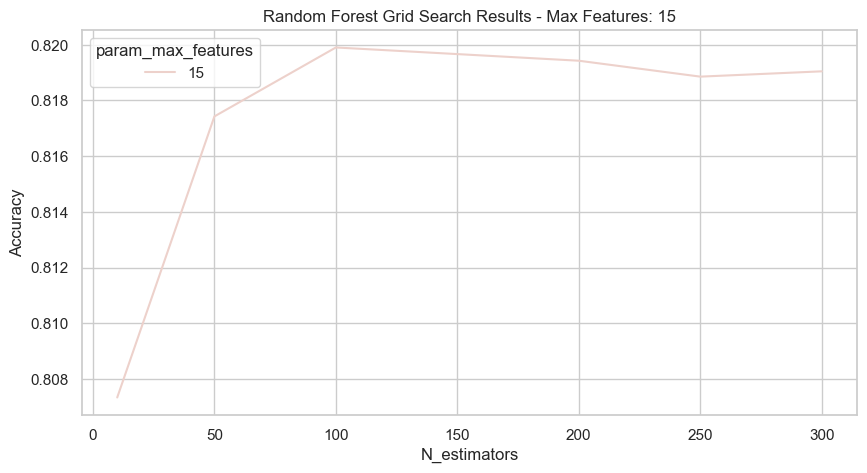

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


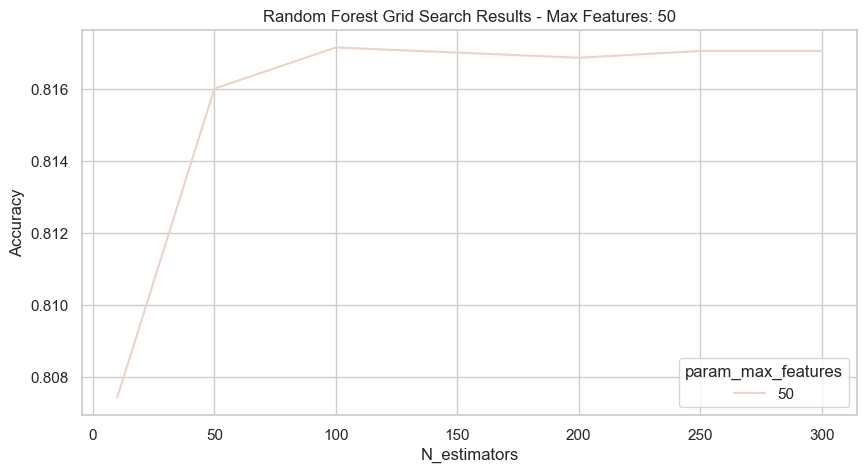

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


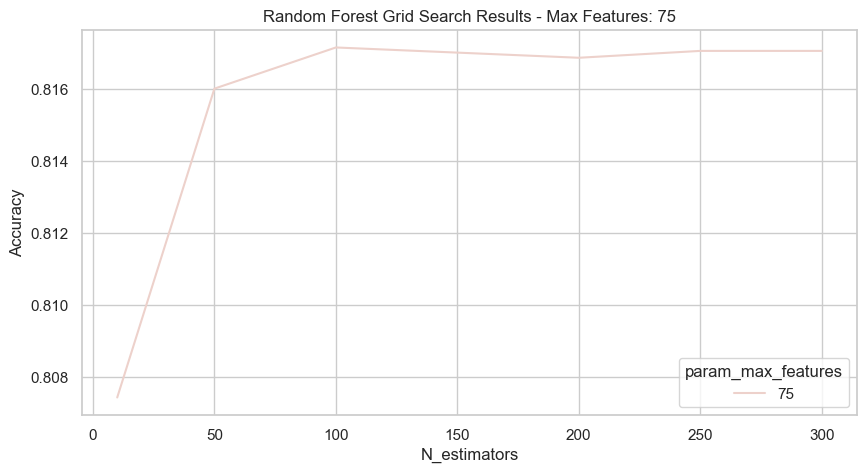

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


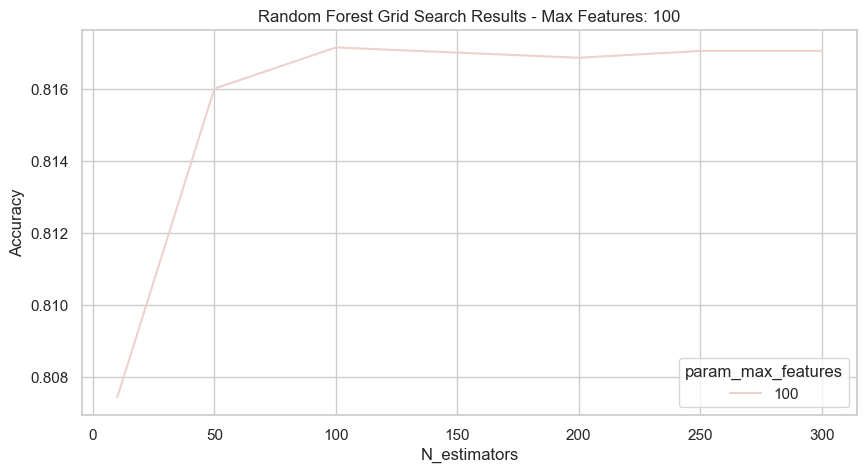

In [69]:
# Convert cv_results dictionary to a DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Set style
sns.set_style("whitegrid")

# Iterate over each value of param_max_features
for max_features in [1, 5, 15, 50, 75, 100]:
    # Filter cv_results for current max_features
    filtered_results = cv_results_df.query(f"param_max_features == {max_features}")
   
    plt.figure(figsize=(10, 5))
    
    # Plot the data
    sns.lineplot(data=filtered_results, x="param_n_estimators", y="mean_test_score", hue="param_max_features", markers=True)
    
    # Set plot title and labels
    plt.title(f"Random Forest Grid Search Results - Max Features: {max_features}")
    plt.xlabel("N_estimators")
    plt.ylabel("Accuracy")
    
    # Show the plot
    plt.show()




## Results
Training with max_features (10,100), n_estimators (20,300), leaf nodes (10,100) and bootstrap by themselves:

- 10 Max features = mean:  0.8181904761904762, 100 Max features = mean:  0.8171428571428571
- 20 estimators = mean:  0.8125714285714287, 300 estimators = mean:  0.817809523809524
- 10 leaf nodes = mean:  0.8182857142857144, 100 leaf nodes = mean:  0.8179999999999998,
- Bootstap = mean:  0.8184761904761906

With these results I can deduce that training with a smaller max feature value gives you a better mean and training with a bigger value of estimates gives you a better mean.

## Grid Search
With the grid search my hyperparameters were bootstrap, max features and n_estimators and random state 42 and I found out that the best paramaters values are'bootstrap': True, 'max_features': 15, 'n_estimators': 100, 'random_state': 42} with a mean of Mean 0.8199047619047619

## XGBoost

In [49]:
from xgboost import XGBClassifier

In [50]:
xbg = XGBClassifier()
scores = cross_val_score(rf, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.81142857 0.8        0.82714286 0.81571429 0.83       0.84
 0.79714286 0.81       0.82571429 0.82       0.81714286 0.81
 0.81571429 0.83       0.80571429]
mean:  0.8170476190476191


In [51]:
# See what paramaters we can change
params = xbg.get_params()
print(params)

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


### Training with 20 estimators

In [56]:
xbg.n_estimators = 20
scores = cross_val_score(xbg, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.78571429 0.77428571 0.79428571 0.80428571 0.78857143 0.81
 0.79142857 0.78142857 0.79857143 0.79571429 0.77428571 0.80571429
 0.80857143 0.79571429 0.79285714]
mean:  0.7934285714285714


### Training with 200 estimators

In [57]:
xbg.n_estimators = 200
scores = cross_val_score(xbg, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.78285714 0.76857143 0.79285714 0.78       0.81       0.79
 0.76714286 0.78857143 0.80142857 0.79285714 0.77857143 0.77428571
 0.79       0.78571429 0.78714286]
mean:  0.786


### Training with 0.01 learning rate

In [58]:
xbg.learning_rate = 0.01
scores = cross_val_score(xbg, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.80857143 0.80571429 0.83       0.82142857 0.83857143 0.83714286
 0.81571429 0.82285714 0.82571429 0.82428571 0.82       0.80857143
 0.83857143 0.82714286 0.81285714]
mean:  0.8224761904761905


### Training with 1 learning rate

In [59]:
xbg.learning_rate = 1
scores = cross_val_score(xbg, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.78285714 0.76857143 0.79285714 0.78       0.81       0.79
 0.76714286 0.78857143 0.80142857 0.79285714 0.77857143 0.77428571
 0.79       0.78571429 0.78714286]
mean:  0.786


### Training with reg_alpha 0.1

In [60]:
xbg.reg_alpha = 0.1
scores = cross_val_score(xbg, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.77428571 0.77142857 0.80571429 0.78       0.79857143 0.81142857
 0.77285714 0.79142857 0.80428571 0.77285714 0.78714286 0.78571429
 0.79142857 0.81       0.78142857]
mean:  0.7892380952380954


### Training with reg_alpha 1

In [61]:
xbg.reg_alpha = 1
scores = cross_val_score(xbg, X_train_scaled, y_train, scoring='accuracy', cv=15)
print('The accuracy for 15 folds: ', scores)
print('mean: ', np.mean(scores))

The accuracy for 15 folds:  [0.78571429 0.75714286 0.81428571 0.78857143 0.79714286 0.80142857
 0.75285714 0.79       0.80571429 0.78142857 0.79428571 0.78428571
 0.77571429 0.80142857 0.77571429]
mean:  0.787047619047619


## Grid Search - Automate the hyperparameters process

In [78]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

#Specifying hyperparameter using a param_grid
params_grid = [
    {'learning_rate' : [0.01, 0.05, 0.1, 0.5, 0.7, 1],
    'n_estimators' : [10, 50, 100, 200, 250,300 ],
     'random_state' : [42]
}
]
grid_search = GridSearchCV(xbg, params_grid, cv=15,
                          scoring='accuracy',
                          return_train_score=True,
                          n_jobs=-1)  # notice n_jobs is number of jobs to run in parallel; when -1, all the processor capacity is used

grid_search.fit(X_train_scaled, y_train)
## Metric scores
y_pred = grid_search.predict(X_test_scaled)
f1 = f1_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

print("F1: ", f1)
print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ",precision)
print()
## Print results from hyperparameters
print('the best parameter values are: ', grid_search.best_params_)
print()
print('the best estimator is: ', grid_search.best_estimator_)
print()
# Display the results for each set of hyperparameters specified
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print("Mean", np.mean(mean_score), params)


F1:  0.4585492227979274
Accuracy:  0.8142222222222222
Recall:  0.354
Precision:  0.6507352941176471

the best parameter values are:  {'learning_rate': 0.01, 'n_estimators': 250, 'random_state': 42}

the best estimator is:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

Mean 0.8213333333333334 {'

## Plotting the results

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


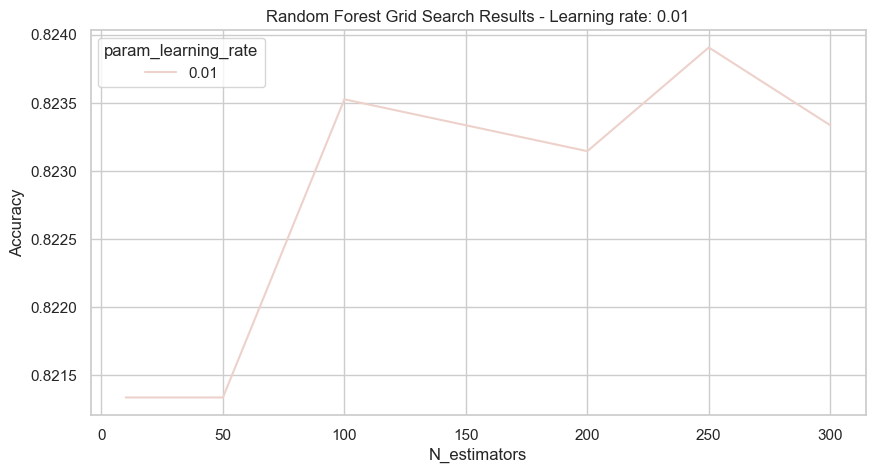

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


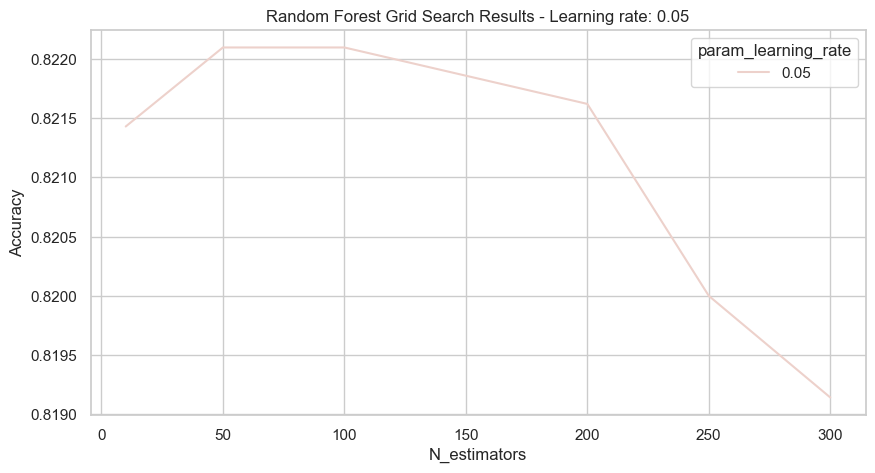

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


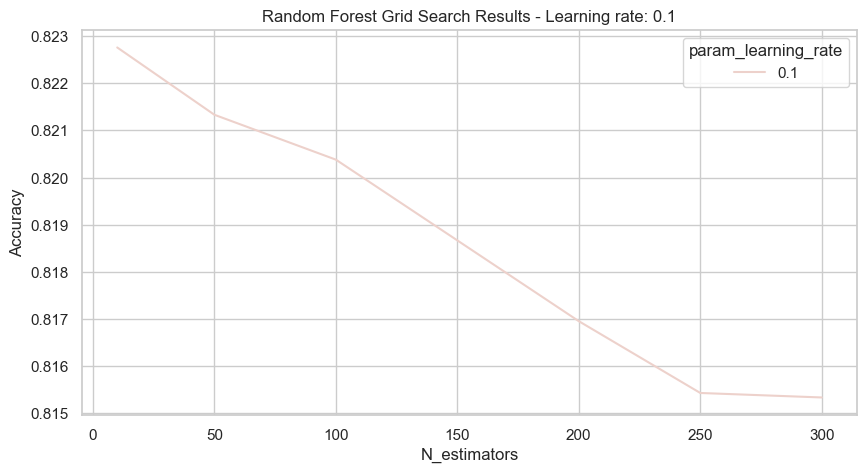

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


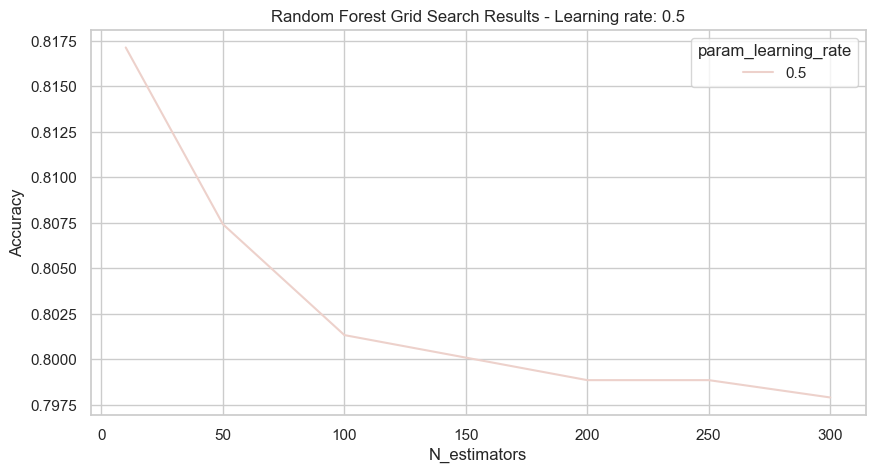

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


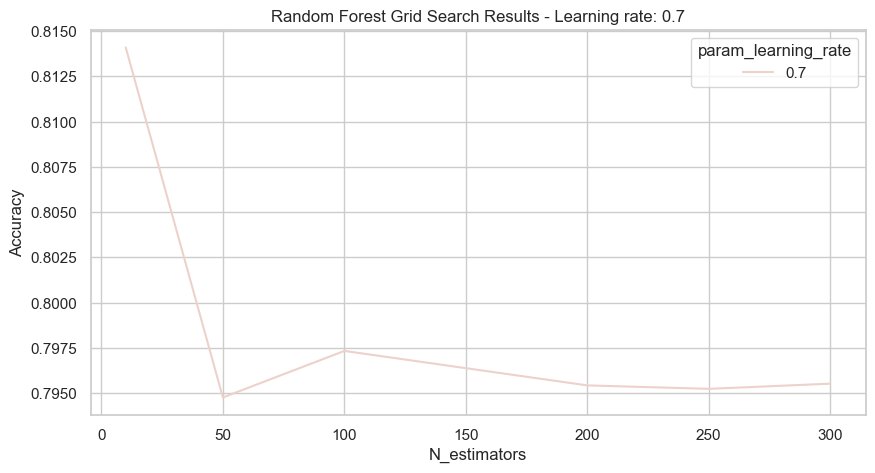

C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ruben\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


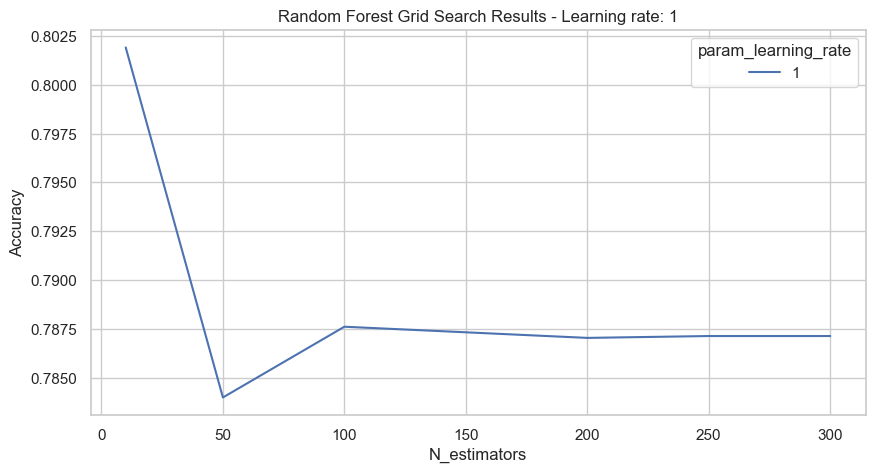

In [72]:
# Convert cv_results dictionary to a DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Set style
sns.set_style("whitegrid")

# Iterate over each value of param_max_features
for learning_rate in [0.01, 0.05, 0.1, 0.5, 0.7, 1]:
    # Filter cv_results for current max_features
    filtered_results = cv_results_df.query(f"param_learning_rate == {learning_rate}")
   
    plt.figure(figsize=(10, 5))
    
    # Plot the data
    sns.lineplot(data=filtered_results, x="param_n_estimators", y="mean_test_score", hue="param_learning_rate", markers=True)
    
    # Set plot title and labels
    plt.title(f"Random Forest Grid Search Results - Learning rate: {learning_rate}")
    plt.xlabel("N_estimators")
    plt.ylabel("Accuracy")
    
    # Show the plot
    plt.show()




## Results

Training with n_estimators (20 and 200), learning rate (0.1 and 1) and reg alpha (0.1 and 1) by themselves:

- 20 n_estimators = mean:  0.7934285714285714, 200 n_estimators = mean:  0.786, 
- learning rate 0.01 = mean:  0.8224761904761905 , learning rate 1 = mean:  0.786 , 
- reg alpha 0.1 = mean:  0.7892380952380954, reg alpha 1 = mean:  0.787047619047619

With these results I discovered that training XGBoost with a smaller value of n_estimators gave me a better mean, training learning rate with a smaller value also gave me a better mean and finally trainig with a smaller reg alpha value also gives me a better mean

## Grid Search result:
With the grid search my hyperparameters were learning rate, n_estimators and a random state of 42, I found out that the best parameter values are:  {'learning_rate': 0.01, 'n_estimators': 250, 'random_state': 42} with a mean of Mean 0.8239047619047619 

## Evaluating on the test set using my best model

After all the models have been build and the results displayed, I was able to deduce that XGBoost produced the best results using GridSearch in terms of accuracy score using 15 folds CV measured for these models - KNN, RF and XGB. The code below displays the best parameters used in the XGBoost and evaluates it on the test set with the F1,accuracy,precision and recall scores along with a confusion matrix with the test results

Definitions
* Accuracy -  Accuracy is literally how good our model is at predicting the correct category (classes or labels)
* Precision - Precision is the ratio of what our model predicted correctly to what our model predicted
* Recall - Recall is the ratio of what our model predicted correctly to what the actual labels are.
* F1 - 1 score, the harmonic mean of recall & precision.

In [79]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
best_model = grid_search.best_estimator_
print("This is the best model: ", best_model)

This is the best model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)


In [80]:
y_pred = best_model.predict(X_test_scaled)

#Calulate metrics
f1 = f1_score(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test, y_pred)
# Print them out
print("Evaluation Scores:")
print("F1 Score: ",f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall ", recall)


Evaluation Scores:
F1 Score:  0.4585492227979274
Accuracy:  0.8142222222222222
Precision:  0.6507352941176471
Recall  0.354


## Confusion Matrix

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)

Confusion matrix: 
 [[3310  190]
 [ 646  354]]


True Negative - Top Left,
False Positives - Top Right,
False Negatives - Bottom Left,
True Positives - Bottom Right

This confusion matrix shows that the best model was good at identifying true negatives and true positives but the value of the false positives and false negatives are still quite high which the test evaluation scores show.

# Conclusion


K-Nearest Neighbour

- F1:  0.3827956989247312, Accuracy:  0.80866666666666666, Recall:  0.267,  Precision:  0.6759493670886076

Random Forest

- F1:  0.4551282051282051, Accuracy:  0.8111111111111111, Recall:  0.355, Precision:  0.6339285714285714


XGBoost

- F1:  0.4585492227979274, Accuracy:  0.8142222222222222, Recall:  0.354, Precision:  0.6507352941176471

This task was to predict one (Y) variable with 23 input (X) variables which can be challenging, I did these based on the accuracy metric and found out that XGBoost was the best one (0.8142222222222222) but had I done based on other metrics the results would be different, if I used F1 XGBoost would still be the best one (0.4585492227979274), if I used Recall Random Forest would be the better model (0.355)and finally had I used Precision K-Nearest Neighbour would be the better one (0.6759493670886076).

Overall I'm satisfied with the data processing , training done on each model along with the data visualisation displayed. The best model (XGBoost) performed well with a very high accuracy and a good precision but didn't do quite well with the F1 and recall metric as their scores were low. I also had a vast amount of hyperparameters especially in Random Forest and XGBoost algorithms that I didn't get to use and these could have made the models produce higher scores additionally the way I processed my data e.g. different split or even no splitting could of had a different impact on the metric scores.